In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as py

In [ ]:
# 한글 폰트 사용
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [2]:
plt.rc('font', family='NanumBarunGothic') 

In [3]:
time = pd.read_csv('./drive/My Drive/Colab Notebooks/dress_up/corona_visualization/Time.csv')
timeAge = pd.read_csv('./drive/My Drive/Colab Notebooks/dress_up/corona_visualization/TimeAge.csv')
timeGender = pd.read_csv('./drive/My Drive/Colab Notebooks/dress_up/corona_visualization/TimeGender.csv')

In [4]:
patientInfo = pd.read_csv('./drive/My Drive/Colab Notebooks/dress_up/corona_visualization/PatientInfo.csv')

patientInfo['infection_case'].unique()

array(['overseas inflow', 'contact with patient', 'Seongdong-gu APT',
       'etc', "Eunpyeong St. Mary's Hospital", 'Shincheonji Church',
       'Dongan Church', 'Guro-gu Call Center', nan, 'Itaewon Clubs',
       'Samsung Medical Center', 'Coupang Logistics Center',
       'Guri Collective Infection', 'KB Life Insurance',
       'Yeongdeungpo Learning Institute', 'Onchun Church',
       'Cheongdo Daenam Hospital', 'Suyeong-gu Kindergarten',
       'Ministry of Oceans and Fisheries', 'gym facility in Cheonan',
       'gym facility in Sejong', 'River of Grace Community Church',
       'Gyeongsan Seorin Nursing Home',
       'Gyeongsan Cham Joeun Community Center',
       'Gyeongsan Jeil Silver Town', 'Bonghwa Pureun Nursing Home',
       'Pilgrimage to Israel', 'Milal Shelter', 'Geochang Church',
       'Changnyeong Coin Karaoke'], dtype=object)

In [ ]:
# # 결측치 처리 - 'None' 문자열로 변경
# patientInfo = patientInfo.fillna('None')

# # 케이스 카테고리화
# church=['Onchun Church','Dongan Church','River of Grace Community Church','Geochang Church','Pilgrimage to Israel']
# nurshing=['Gyeongsan Seorin Nursing Home',"Eunpyeong St. Mary's Hospital",'Bonghwa Pureun Nursing Home','Milal Shelter','Suyeong-gu Kindergarten','Gyeongsan Jeil Silver Town','Cheongdo Daenam Hospital','Gyeongsan Cham Joeun Community Center']
# gym=['gym facility in Sejong','gym facility in Cheonan']
# etc=['Changnyeong Coin Karaoke','Seongdong-gu APT', 'etc']
# work = ['Guro-gu Call Center','Ministry of Oceans and Fisheries']
# shincheonji = ['Shincheonji Church', 'None']

# category_name = ['Church related','Nurshing related', 'Gym related', 'ETC', 'Workplace related', 'Shincheonji Church']
# for i,category in enumerate([church, nurshing, gym, etc, work, shincheonji]):
#     # enumerate = { 0 : church, 1 : nurshing, 2 : gym, 3 : etc, 4 : work, 5 : shincheonji }
#     # category = [ church, nurshing, gym, etc, work, shincheonji ]
#     patientInfo.infection_case = patientInfo.infection_case.replace(category, category_name[i])
#     # infection_case의 열에 있는 값을 ['Church related','Nurshing related', 'Gym related', 'ETC', 'Workplace related', 'Shincheonji Church'] 으로 바꾸겠다.

# patientInfo.iloc[24:26, 7:10] # 24번 데이터는 Eunpyeong St. Mary's Hospital -> Nurshing related 변화, 25번 데이터는 etc -> ETC 변화

In [ ]:
# 지역별로 분류해서 그래프 만들기
# sub_title=["수도권 지역", "영남 지역", "호남 지역"]
# fig = make_subplots(rows=1, cols=3,
#                     specs=[[{'type':'domain'},{'type':'domain'}]],
#                    subplot_titles=([f'>' for prov in sub_title]))
# # 재 작성 필요

# 지역별 확진자 수 증가 양상

In [5]:
timeProvince = pd.read_csv('./drive/My Drive/Colab Notebooks/dress_up/corona_visualization/TimeProvince.csv')
timeProvince

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0
...,...,...,...,...,...,...
2256,2020-05-31,0,Jeollabuk-do,21,19,0
2257,2020-05-31,0,Jeollanam-do,19,17,0
2258,2020-05-31,0,Gyeongsangbuk-do,1379,1295,54
2259,2020-05-31,0,Gyeongsangnam-do,123,121,0


In [6]:
timeProvince['province'].unique() # province의 모든 값

array(['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Daejeon',
       'Ulsan', 'Sejong', 'Gyeonggi-do', 'Gangwon-do',
       'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do',
       'Jeollanam-do', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Jeju-do'],
      dtype=object)

In [7]:
# province와 date 기준으로 정렬
sort = timeProvince.sort_values(by=['province', 'date'] ,ascending=[False, True])
sort

,date,time,province,confirmed,released,deceased
6,2020-01-20,16,Ulsan,0,0,0
23,2020-01-21,16,Ulsan,0,0,0
40,2020-01-22,16,Ulsan,0,0,0
57,2020-01-23,16,Ulsan,0,0,0
74,2020-01-24,16,Ulsan,0,0,0
...,...,...,...,...,...,...
2177,2020-05-27,0,Busan,144,135,3
2194,2020-05-28,0,Busan,145,136,3
2211,2020-05-29,0,Busan,145,136,3
2228,2020-05-30,0,Busan,146,138,3


In [9]:
# 피벗테이블 생성 / 행 = 날짜, 열 = 지역, 값 = 확진자 수 / 지역별 확진자 수 증가 파악 가능

confirmed = pd.pivot_table(timeProvince, index='date',columns='province', values='confirmed') # 행 = 날짜, 열 = 지역, 값 = 확진자 수 / 지역별 확진자 수 증가 파악 가능
confirmed.head(10)
# confirmed.iloc[:, 15:16] # 서울 데이터

province,Busan,Chungcheongbuk-do,Chungcheongnam-do,Daegu,Daejeon,Gangwon-do,Gwangju,Gyeonggi-do,Gyeongsangbuk-do,Gyeongsangnam-do,Incheon,Jeju-do,Jeollabuk-do,Jeollanam-do,Sejong,Seoul,Ulsan
date,,,,,,,,,,,,,,,,,
2020-01-20,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2020-01-21,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2020-01-22,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,1,0
2020-01-28,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,1,0


In [10]:
# 지역별로 분류해 날짜순으로 확진자 수가 얼마나 증가하는 지 확인할 수 있다.

youngnam = ['Busan', 'Daegu', 'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Ulsan']
honam = ['Gwangju', 'Jeollabuk-do', 'Jeollanam-do']
hosae = ['Chungcheongbuk-do', 'Chungcheongnam-do', 'Daejeon', 'Sejong']
sudo = ['Gyeonggi-do', 'Incheon', 'Seoul']
gandong = ['Gangwon-do']

confirmed['youngnam'] = confirmed[youngnam].sum(axis=1)
confirmed['honam'] = confirmed[honam].sum(axis=1)
confirmed['hosae'] = confirmed[hosae].sum(axis=1)
confirmed['sudo'] = confirmed[sudo].sum(axis=1)
confirmed['gandong'] = confirmed[gandong].sum(axis=1)

confirmed.iloc[:,17:23]

province,youngnam,honam,hosae,sudo,gandong
date,,,,,
2020-01-20,0,0,0,1,0
2020-01-21,0,0,0,1,0
2020-01-22,0,0,0,1,0
2020-01-23,0,0,0,1,0
2020-01-24,0,0,0,2,0
...,...,...,...,...,...
2020-05-27,8573,69,297,1734,56
2020-05-28,8577,69,298,1801,56
2020-05-29,8577,69,298,1859,56


# 지역별 누적 확진자 수 증가 양상

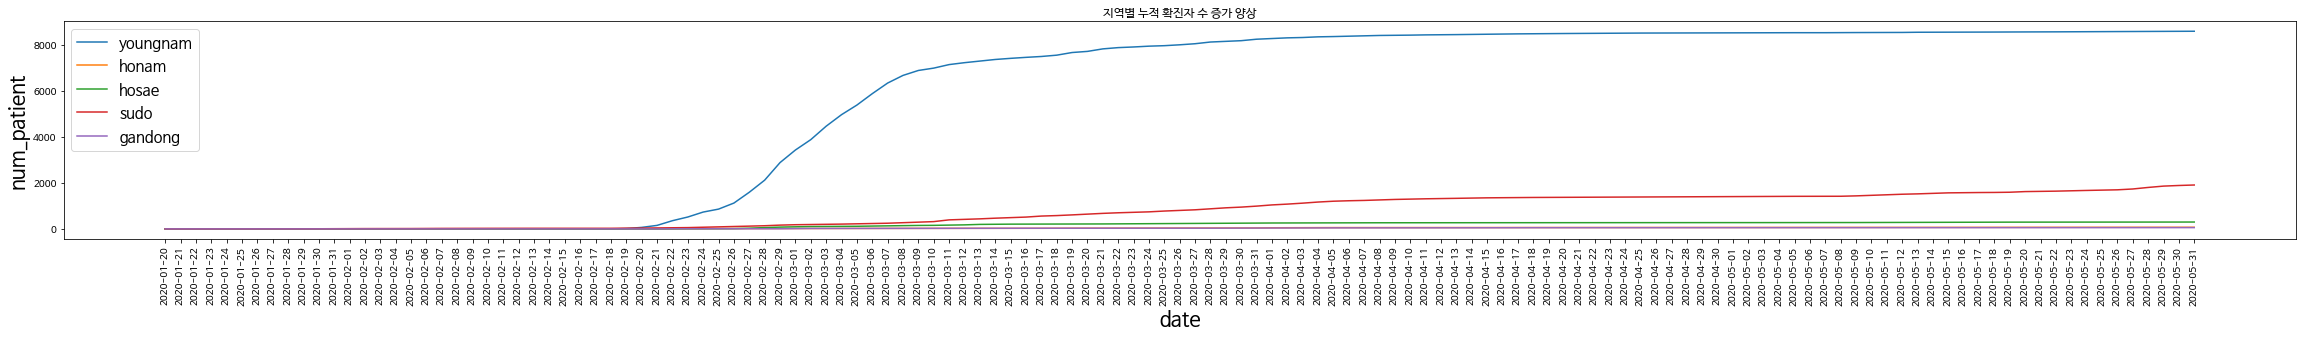

In [26]:
# 지역별 누적 확진자 수 증가 양상

plt.title("지역별 누적 확진자 수 증가 양상")

plt.plot(confirmed.index, confirmed['youngnam'], label='youngnam')
plt.plot(confirmed.index, confirmed['honam'], label='honam')
plt.plot(confirmed.index, confirmed['hosae'], label='hosae')
plt.plot(confirmed.index, confirmed['sudo'], label='sudo')
plt.plot(confirmed.index, confirmed['gandong'], label='gandong')
plt.legend(loc=2)
plt.xlabel('date', fontsize=20)
plt.ylabel('num_patient', fontsize=20)
plt.xticks(rotation=90)
plt.legend(loc=2, fontsize=15)
plt.xlabel('date')
plt.ylabel('num_patient')
# py.rcParams["figure.figsize"] = 40, 4
plt.show()

# 지역별 신규 확진자 수 증가 양상


In [12]:
# 지역별 신규 확진자 수 리스트 생성

youngnam_new_list, honam_new_list, hosae_new_list, sudo_new_list, gandong_new_list = list(), list(), list(), list(), list()
for i in range(len(confirmed['youngnam'])):
    if i == 0:
        youngnam_new_list.append(confirmed['youngnam'][0])
    else:
        j = confirmed['youngnam'][i] - confirmed['youngnam'][i-1]
        youngnam_new_list.append(j)

for i in range(len(confirmed['honam'])):
    if i == 0:
        honam_new_list.append(confirmed['honam'][0])
    else:
        j = confirmed['honam'][i] - confirmed['honam'][i-1]
        honam_new_list.append(j)

for i in range(len(confirmed['hosae'])):
    if i == 0:
       hosae_new_list.append(confirmed['hosae'][0])
    else:
        j = confirmed['hosae'][i] - confirmed['hosae'][i-1]
        hosae_new_list.append(j)


for i in range(len(confirmed['sudo'])):
    if i == 0:
        sudo_new_list.append(confirmed['sudo'][0])
    else:
        j = confirmed['sudo'][i] - confirmed['sudo'][i-1]
        sudo_new_list.append(j)

for i in range(len(confirmed['gandong'])):
    if i == 0:
        gandong_new_list.append(confirmed['gandong'][0])
    else:
        j = confirmed['gandong'][i] - confirmed['gandong'][i-1]
        gandong_new_list.append(j)

In [13]:
# 신규 확진자 수 colunms 추가

confirmed['youngnam_new'] = youngnam_new_list
confirmed['honam_new'] = honam_new_list
confirmed['hosae_new'] = hosae_new_list
confirmed['sudo_new'] = sudo_new_list
confirmed['gandong_new'] = gandong_new_list

confirmed.iloc[:, 22:29]

province,youngnam_new,honam_new,hosae_new,sudo_new,gandong_new
date,,,,,
2020-01-20,0,0,0,1,0
2020-01-21,0,0,0,0,0
2020-01-22,0,0,0,0,0
2020-01-23,0,0,0,0,0
2020-01-24,0,0,0,1,0
...,...,...,...,...,...
2020-05-27,3,0,0,36,0
2020-05-28,4,0,1,67,0
2020-05-29,0,0,0,58,0


# 수도권 신규 확진자 및 누적 확진자 수 증가 양상

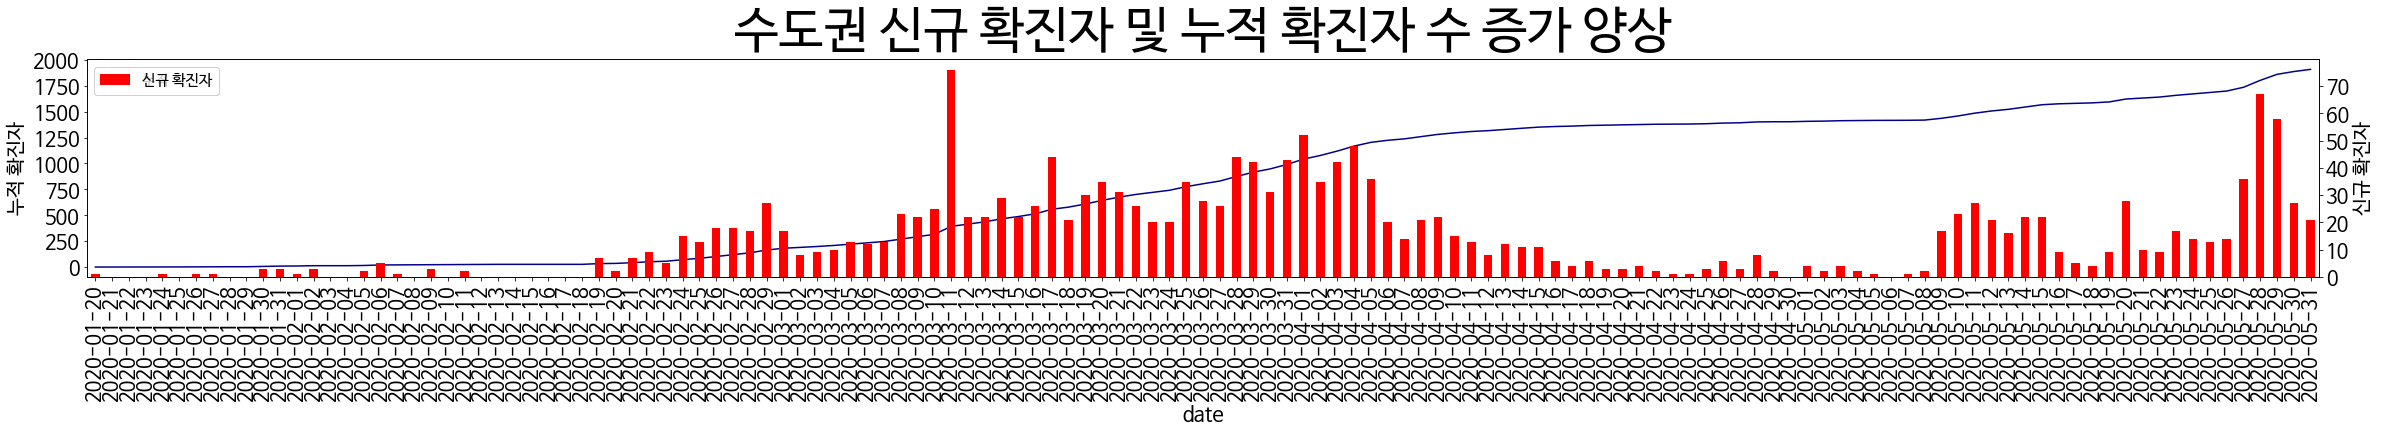

In [68]:
# 수도권 신규 확진자 및 누적 확진자 수 증가 양상 피벗 테이블 시각화

ax = confirmed.plot(kind='line', y='sudo', color='DarkBlue', fontsize=20)
ax2 = confirmed.plot(kind='bar', y='sudo_new', secondary_y=True, color='Red', ax=ax, fontsize=20)
# plt.legend(loc=2)
ax.legend(['누적 확진자'], fontsize=15) # 누적 확진자 범례가 출력되지 않는 문제 해결 필요!!!!!!
ax2.legend(['신규 확진자'], fontsize=15) 
plt.title('수도권 신규 확진자 및 누적 확진자 수 증가 양상', fontsize=50)
ax.set_ylabel('누적 확진자', fontsize=20)
ax2.set_ylabel('신규 확진자', fontsize=20)
ax.set_xlabel('date', fontsize=20)
plt.show()

# 영남지방 신규 확진자 및 누적 확진자 수 증가 양상

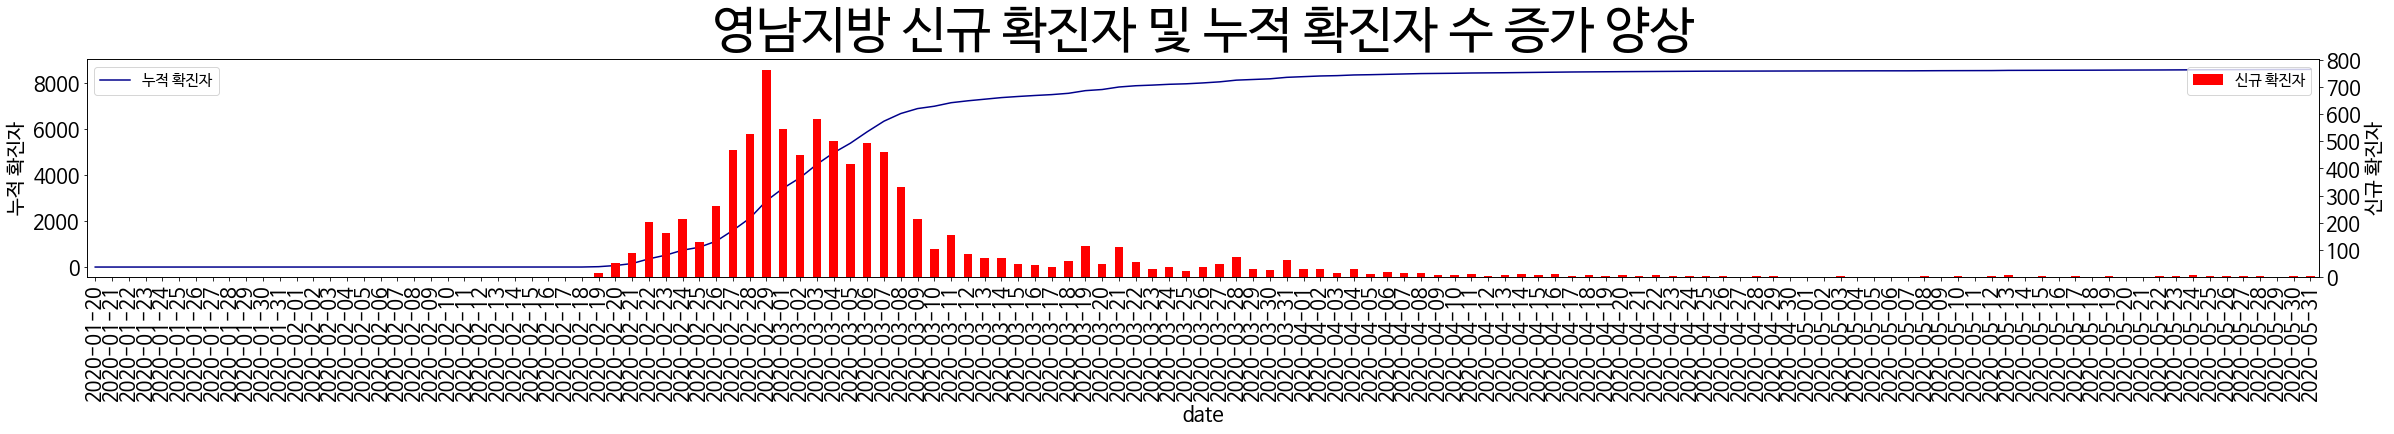

In [67]:
# 영남지방 신규 확진자 및 누적 확진자 수 증가 양상 피벗 테이블 시각화

ax = confirmed.plot(kind='line', y='youngnam', color='DarkBlue', fontsize=20)
ax2 = confirmed.plot(kind='bar', y='youngnam_new', secondary_y=True, color='Red', ax=ax, fontsize=20)
# plt.legend(loc=2)
ax.legend(['누적 확진자'], fontsize=15) # 누적 확진자 범례가 출력되지 않는 문제 해결 필요!!!!!!
ax2.legend(['신규 확진자'], fontsize=15) 
plt.title('영남지방 신규 확진자 및 누적 확진자 수 증가 양상', fontsize=50)
ax.set_ylabel('누적 확진자', fontsize=20)
ax2.set_ylabel('신규 확진자', fontsize=20)
ax.set_xlabel('date', fontsize=20)
plt.show()

# 호남지방 신규 확진자 및 누적 확진자 수 증가 양상

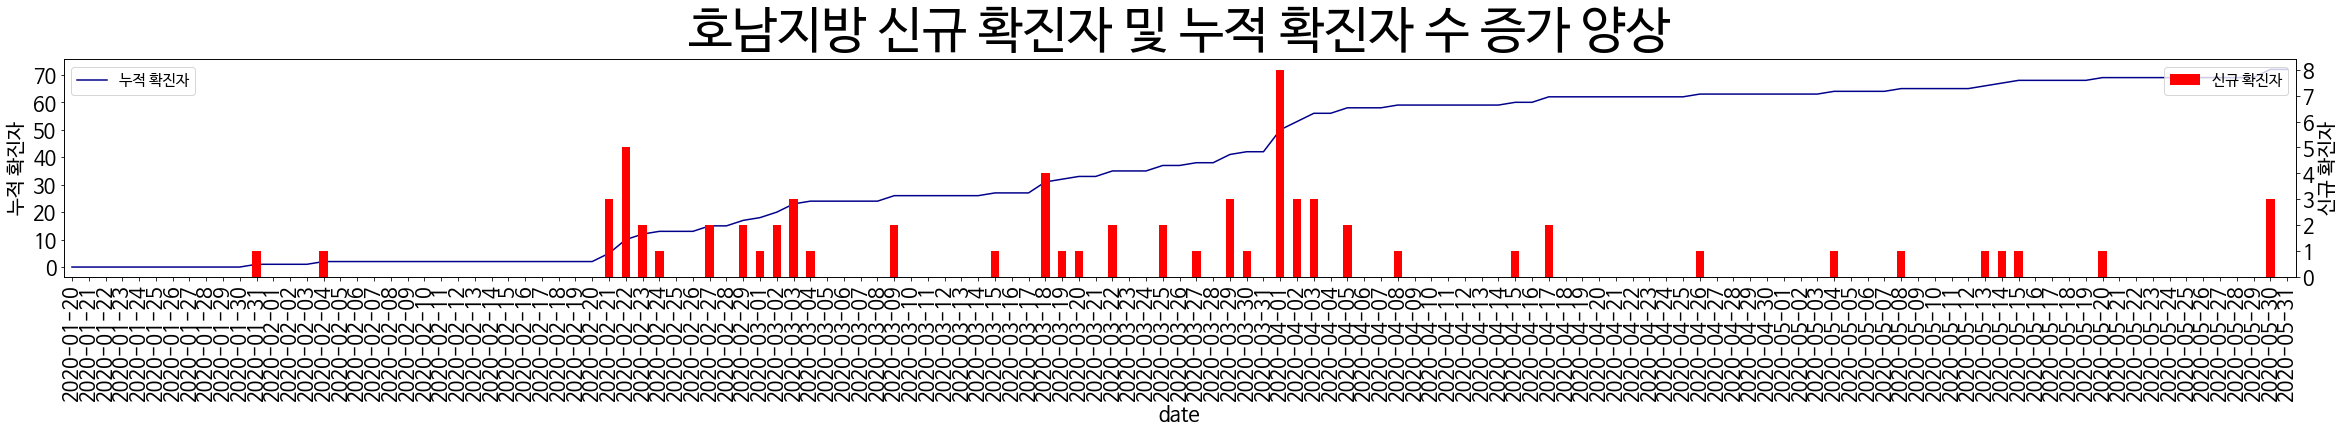

In [66]:
# 호남지방 신규 확진자 및 누적 확진자 수 증가 양상 피벗 테이블 시각화

ax = confirmed.plot(kind='line', y='honam', color='DarkBlue', fontsize=20)
ax2 = confirmed.plot(kind='bar', y='honam_new', secondary_y=True, color='Red', ax=ax, fontsize=20)
# plt.legend(loc=2)
ax.legend(['누적 확진자'], fontsize=15) # 누적 확진자 범례가 출력되지 않는 문제 해결 필요!!!!!!
ax2.legend(['신규 확진자'], fontsize=15) 
plt.title('호남지방 신규 확진자 및 누적 확진자 수 증가 양상', fontsize=50)
ax.set_ylabel('누적 확진자', fontsize=20)
ax2.set_ylabel('신규 확진자', fontsize=20)
ax.set_xlabel('date', fontsize=20)
plt.show()

# 호서지방 신규 확진자 및 누적 확진자 수 증가 양상

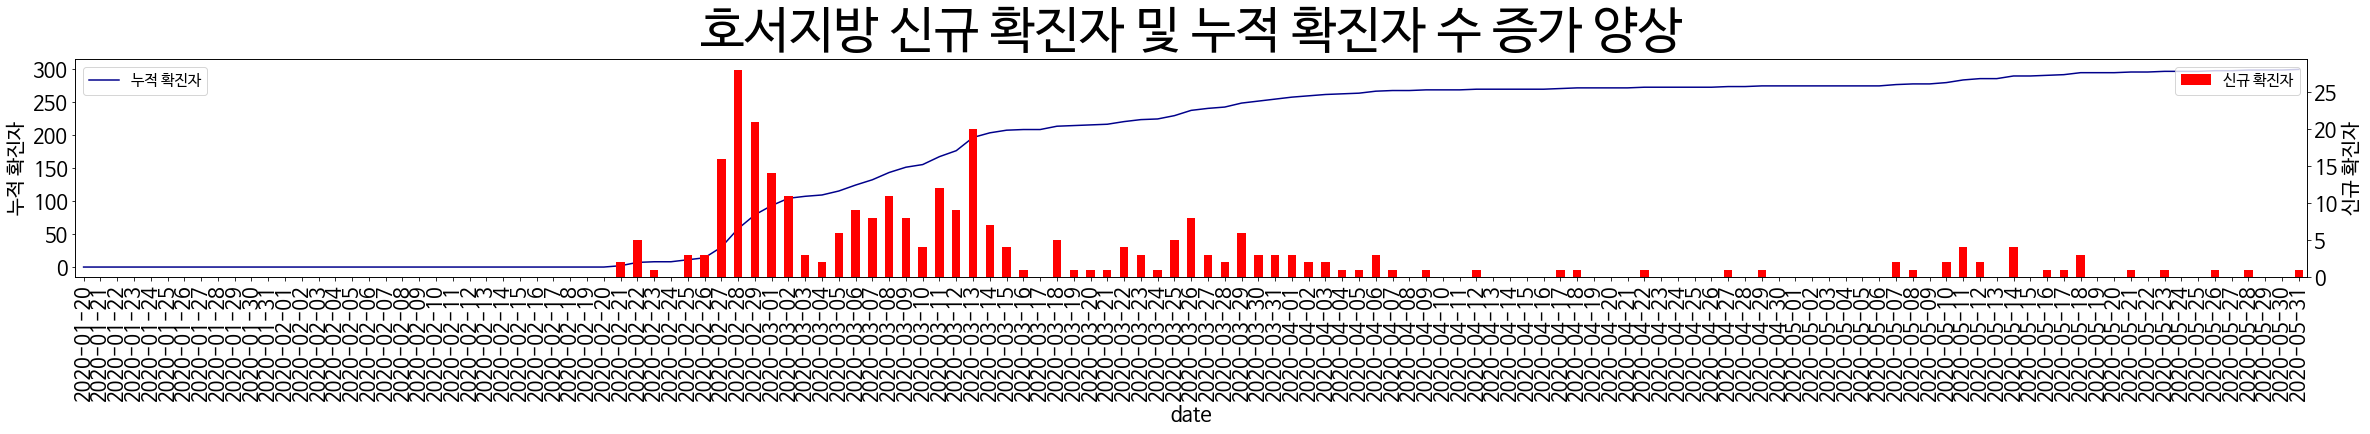

In [65]:
# 호서지방 신규 확진자 및 누적 확진자 수 증가 양상 피벗 테이블 시각화

ax = confirmed.plot(kind='line', y='hosae', color='DarkBlue', fontsize=20)
ax2 = confirmed.plot(kind='bar', y='hosae_new', secondary_y=True, color='Red', ax=ax, fontsize=20)
# plt.legend(loc=2)
ax.legend(['누적 확진자'], fontsize=15) # 누적 확진자 범례가 출력되지 않는 문제 해결 필요!!!!!!
ax2.legend(['신규 확진자'], fontsize=15) 
plt.title('호서지방 신규 확진자 및 누적 확진자 수 증가 양상', fontsize=50)
ax.set_ylabel('누적 확진자', fontsize=20)
ax2.set_ylabel('신규 확진자', fontsize=20)
ax.set_xlabel('date', fontsize=20)
plt.show()

# 관동지방 신규 확진자 및 누적 확진자 수 증가 양상

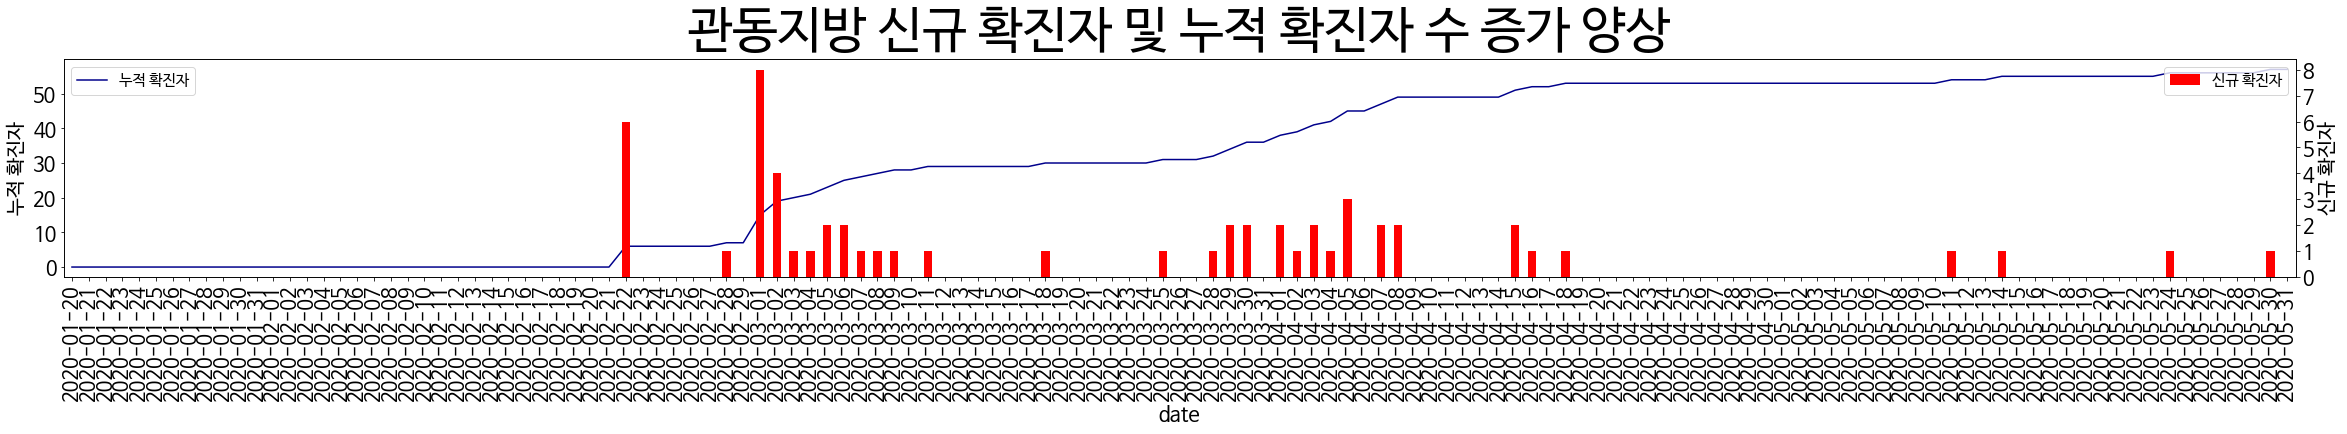

In [64]:
# 관동지방 신규 확진자 및 누적 확진자 수 증가 양상 피벗 테이블 시각화

ax = confirmed.plot(kind='line', y='gandong', color='DarkBlue', fontsize=20)
ax2 = confirmed.plot(kind='bar', y='gandong_new', secondary_y=True, color='Red', ax=ax, fontsize=20)
# plt.legend(loc=2)
ax.legend(['누적 확진자'], fontsize=15) # 누적 확진자 범례가 출력되지 않는 문제 해결 필요!!!!!!
ax2.legend(['신규 확진자'], fontsize=15) 
plt.title('관동지방 신규 확진자 및 누적 확진자 수 증가 양상', fontsize=50)
ax.set_ylabel('누적 확진자', fontsize=20)
ax2.set_ylabel('신규 확진자', fontsize=20)
ax.set_xlabel('date', fontsize=20)
plt.show()